In [1]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [80]:
#load the dataset
df = pd.read_csv('car_price.csv')

In [3]:
df

Unnamed: 0                 Brand                Model Variant  \
0              0    Honda Amaze (2018)            VX i-VTEC  MANUAL   
1              1    Hyundai I20 (2014)           Magna Plus  MANUAL   
2              2                    --                   --      --   
3              3                    --                   --      --   
4              4  Hyundai Verna (2012)  Fluidic 1.6 CRDi SX  MANUAL   
...          ...                   ...                  ...     ...   
6578        6578                    --                   --      --   
6579        6579                    --                   --      --   
6580        6580                    --                   --      --   
6581        6581                    --                   --      --   
6582        6582                    --                   --      --   

     Manufacturing year Driven kilometers    Fuel Number of owners     Price  
0                  2018        15947.0 KM  PETROL              1st  7,90,000  
1                  2014        32000.0 KM  PETROL              1st  4,00,000  
2                    --                --      --               --        --  
3                    --                --      --               --        --  
4                  2012        78645.0 KM  DIESEL              2nd  3,99,000  
...                 ...               ...     ...              ...       ...  
6578                 --                --      --               --        --  
6579                 --                --      --               --        --  
6580                 --                --      --               --        --  
6581                 --                --      --               --        --  
6582                 --                --      --               --        --  

[6583 rows x 9 columns]

In [4]:
#checking for null values
df.isnull().sum()

Unnamed: 0              0
Brand                   0
Model                  13
Variant               113
Manufacturing year      0
Driven kilometers       0
Fuel                    0
Number of owners        0
Price                   0
dtype: int64

In [5]:
#drop null columns
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0            0
Brand                 0
Model                 0
Variant               0
Manufacturing year    0
Driven kilometers     0
Fuel                  0
Number of owners      0
Price                 0
dtype: int64

In [6]:
print (df.dtypes)

Unnamed: 0             int64
Brand                 object
Model                 object
Variant               object
Manufacturing year    object
Driven kilometers     object
Fuel                  object
Number of owners      object
Price                 object
dtype: object


In [7]:
df['Price'] = df['Price'].replace(['--'],'0')

In [8]:
df = df.replace(['--'],'0')

In [9]:
df['Price'] = df['Price'].replace('₹','', regex=True)
df['Price'] = df['Price'].replace(',','', regex=True).astype(float)
    

In [10]:
df['Driven kilometers'] = df['Driven kilometers'].replace('KM','', regex=True)
df['Driven kilometers'] = df['Driven kilometers'].replace('Kms','', regex=True)
df['Driven kilometers'] = df['Driven kilometers'].replace('km','', regex=True)
df['Driven kilometers'] = df['Driven kilometers'].replace(',','', regex=True).astype(float)

In [83]:
df['Number of owners'] = df['Number of owners'].replace('owner','', regex=True)

In [11]:
print (df.dtypes)

Unnamed: 0              int64
Brand                  object
Model                  object
Variant                object
Manufacturing year     object
Driven kilometers     float64
Fuel                   object
Number of owners       object
Price                 float64
dtype: object


In [12]:
#Lowercase the Fuel
df['Fuel']=df['Fuel'].apply(lambda x: x.lower())

In [81]:
#Lowercase the Variant
df['Variant']=df['Variant'].apply(lambda x: x.lower())

In [84]:
#Lowercase the Number of owners
df['Number of owners']=df['Number of owners'].apply(lambda x: x.lower())

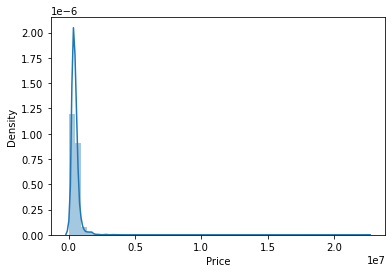

In [13]:
#The distribution of review sentiment polarity score
ax = sns.distplot(df['Price'])

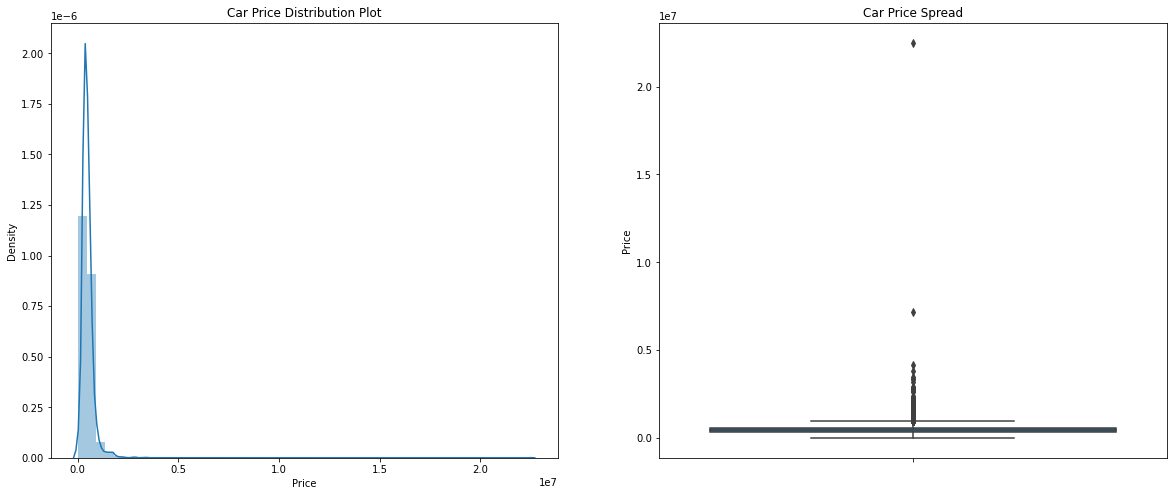

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['Price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df['Price'])

plt.show()

In [43]:
df['Fuel'].value_counts()

petrol           4038
diesel           2175
0                 147
cng                75
cng & hybrids      16
lpg                 4
13,807 km           1
3,362 km            1
Name: Fuel, dtype: int64

In [59]:
df['Variant'].value_counts()

MANUAL       3054
Manual       2498
AUTOMATIC     457
Automatic     340
0             108
Name: Variant, dtype: int64

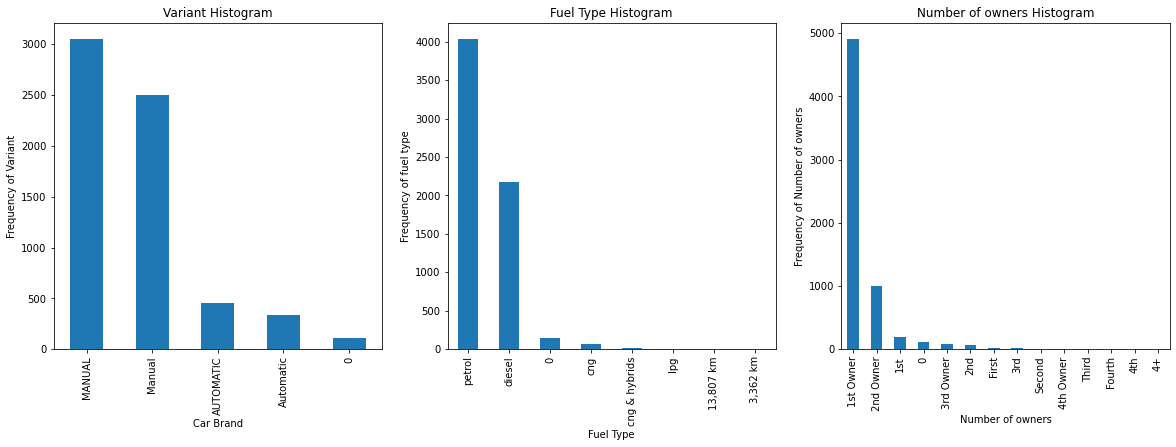

In [62]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = df['Variant'].value_counts().plot(kind='bar')
plt.title('Variant Histogram')
plt1.set(xlabel = 'Car Brand', ylabel='Frequency of Variant')

plt.subplot(1,3,2)
plt1 = df['Fuel'].value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df['Number of owners'].value_counts().plot(kind='bar')
plt.title('Number of owners Histogram')
plt1.set(xlabel = 'Number of owners', ylabel='Frequency of Number of owners')

plt.show()

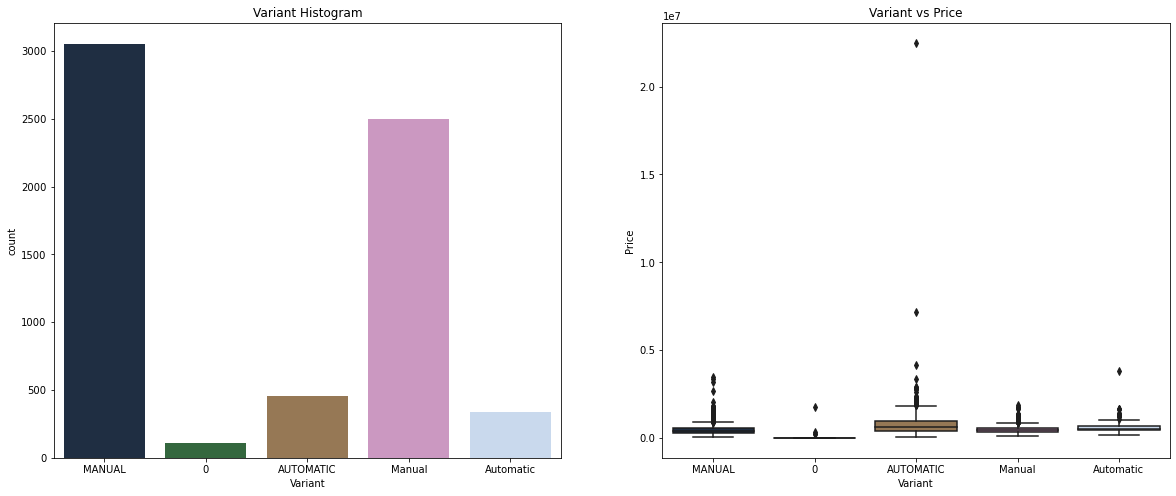

In [63]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Variant Histogram')
sns.countplot(df['Variant'], palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Variant vs Price')
sns.boxplot(x=df['Variant'], y=df['Price'], palette=("cubehelix"))

plt.show()

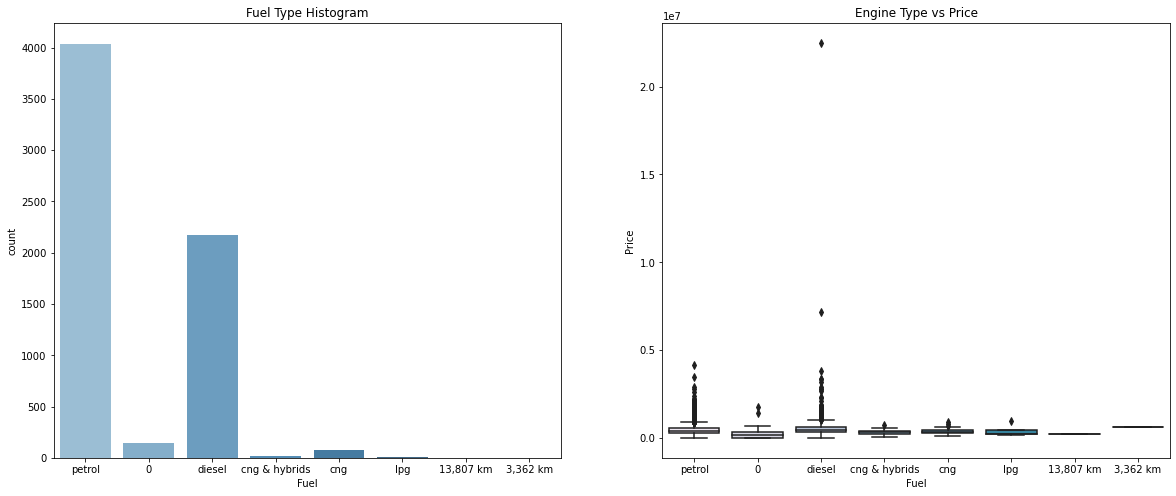

In [64]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(df['Fuel'], palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df['Fuel'], y=df['Price'], palette=("PuBuGn"))

plt.show()



Text(0.5, 0, 'Fuel')

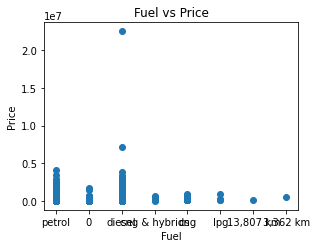

In [65]:
plt.figure(figsize=(10,20))
plt.subplot(5,2,1)
plt.scatter(df['Fuel'],df['Price'])
plt.title('Fuel vs Price')
plt.ylabel('Price')
plt.xlabel('Fuel')

Text(0.5, 0, 'Number of owners')

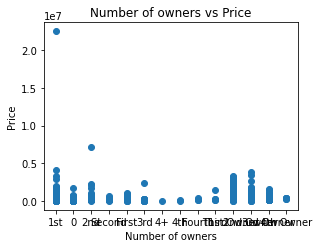

In [66]:
plt.figure(figsize=(10,20))
plt.subplot(5,2,1)
plt.scatter(df['Number of owners'],df['Price'])
plt.title('Number of owners vs Price')
plt.ylabel('Price')
plt.xlabel('Number of owners')

Text(0.5, 0, 'Manufacturing year')

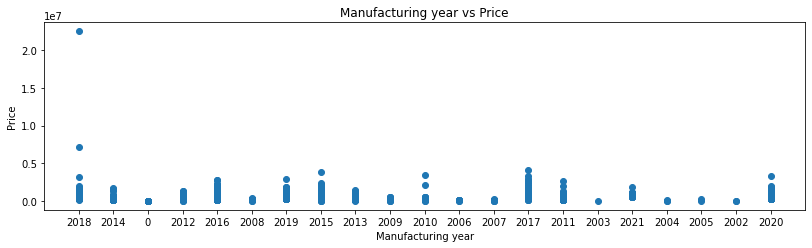

In [67]:
plt.figure(figsize=(30,20))
plt.subplot(5,2,1)
plt.scatter(df['Manufacturing year'],df['Price'])
plt.title('Manufacturing year vs Price')
plt.ylabel('Price')
plt.xlabel('Manufacturing year')

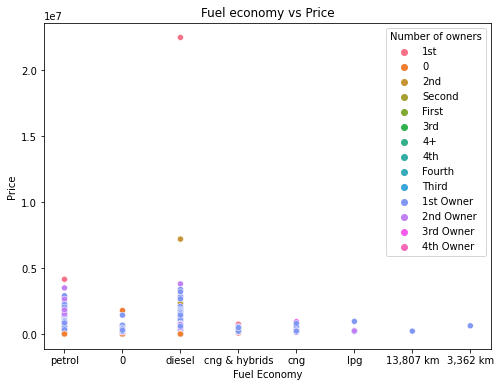

<Figure size 432x288 with 0 Axes>

In [68]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['Fuel'],y=df['Price'],hue=df['Number of owners'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

In [85]:
labelencoder = LabelEncoder()
df['Variant'] = labelencoder.fit_transform(df['Variant'])

In [86]:
df['Number of owners'] = labelencoder.fit_transform(df['Number of owners'])

In [87]:
df['Fuel'] = labelencoder.fit_transform(df['Fuel'])

In [72]:
df.shape

(6457, 9)

In [88]:
df

Unnamed: 0  Unnamed: 0.1                 Brand                Model  \
0              0             0    Honda Amaze (2018)            VX i-VTEC   
1              1             1    Hyundai I20 (2014)           Magna Plus   
2              2             2                     0                    0   
3              3             3                     0                    0   
4              4             4  Hyundai Verna (2012)  Fluidic 1.6 CRDi SX   
...          ...           ...                   ...                  ...   
6452        6578          6578                     0                    0   
6453        6579          6579                     0                    0   
6454        6580          6580                     0                    0   
6455        6581          6581                     0                    0   
6456        6582          6582                     0                    0   

      Variant  Manufacturing year  Driven kilometers  Fuel  Number of owners  \
0           2                2018            15947.0     7                 1   
1           2                2014            32000.0     7                 1   
2           0                   0                0.0     0                 0   
3           0                   0                0.0     0                 0   
4           2                2012            78645.0     5                 3   
...       ...                 ...                ...   ...               ...   
6452        0                   0                0.0     5                 0   
6453        0                   0                0.0     7                 0   
6454        0                   0                0.0     5                 0   
6455        0                   0                0.0     5                 0   
6456        0                   0                0.0     5                 0   

         Price  
0     790000.0  
1     400000.0  
2          0.0  
3          0.0  
4     399000.0  
...        ...  
6452       0.0  
6453       0.0  
6454       0.0  
6455       0.0  
6456       0.0  

[6457 rows x 10 columns]

In [89]:
df_new = df[['Variant','Number of owners','Fuel','Driven kilometers','Price']]

In [90]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [91]:
#Dividing data into X and y variables
y = df_new.pop('Price')
x = df_new

In [96]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
lm = LinearRegression()
lm.fit(x,y)
rfe = RFE(lm, 10)
rfe = rfe.fit(x, y)

In [100]:
x.columns[rfe.support_]

Index(['Variant', 'Number of owners', 'Fuel', 'Driven kilometers'], dtype='object')

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.80,random_state=180)

In [119]:
# Making predictions
y_pred = lm.predict(x_test)

In [120]:
r2_score(y_test, y_pred)

0.01149004051642366